# NLP Project 'Twitter Sentiment Analysis'

## Problem Statement

Perform a sentiment analysis of the tweets from customers serviced by each major U.S. airline.

## Dataset Description

**Overview**: The "Twitter US Airline Sentiment" dataset contains tweets posted by customers about major US airlines. Each tweet is labeled with a sentiment category indicating whether the customer expressed positive, neutral, or negative feelings about the airline.

**Dataset Name**: Twitter US Airline Sentiment

**Source**: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

**The dataset has the following columns**:

- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

## Import the libraries

In [71]:
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                           
import seaborn as sns                                                    

from collections import Counter                                                 

import re, string, unicodedata                                                  
import contractions                                                             
from bs4 import BeautifulSoup                                                   

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator                 
import nltk                                                                     
from nltk.corpus import stopwords                                             
from nltk.tokenize import word_tokenize, sent_tokenize                          
from nltk.stem.wordnet import WordNetLemmatizer                                 
from nltk.stem.porter import PorterStemmer                                     

from sklearn.feature_extraction.text import CountVectorizer                   
from sklearn.feature_extraction.text import TfidfVectorizer                     

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier                             
from sklearn.metrics import classification_report                               
from sklearn.model_selection import cross_val_score 

# download stopwords
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
) 

## Load Dataset

In [86]:
tweets = pd.read_csv('Tweets.csv')
df = tweets.copy()

## Oveview of the dataset

In [89]:
df.shape

(14640, 15)

In [91]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [95]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.35,NaN,0.00,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.00,Customer Service Issue,1.00,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.00,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.00,Customer Service Issue,0.67,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.68,NaN,0.00,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Data Cleaning

In [98]:
# convert all columns with dtype object into category to save memory
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [100]:
# convert tweet_id into a category to save memory
df['tweet_id'] = df['tweet_id'].astype('category')

In [106]:
# convert tweet_created into a datetime to allow for time series analysis
df['tweet_created'] = pd.to_datetime(df['tweet_created'], errors='coerce')
df['tweet_created'] = df['tweet_created'].dt.tz_localize(None)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  category      
 1   airline_sentiment             14640 non-null  category      
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   category      
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  category      
 6   airline_sentiment_gold        40 non-null     category      
 7   name                          14640 non-null  category      
 8   negativereason_gold           32 non-null     category      
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  category      
 11  tweet_coord                 

## Exploratory data analysis (EDA)

In [111]:
# show summary of all numerical variables
df.describe().T

,count,mean,min,25%,50%,75%,max,std
airline_sentiment_confidence,14640.00,0.90,0.34,0.69,1.00,1.00,1.00,0.16
negativereason_confidence,10522.00,0.64,0.00,0.36,0.67,1.00,1.00,0.33
retweet_count,14640.00,0.08,0.00,0.00,0.00,0.00,44.00,0.75
tweet_created,14640,2015-02-21 11:33:24.781216,2015-02-16 23:36:05,2015-02-19 15:54:05.750000128,2015-02-22 04:44:35.500000,2015-02-23 08:04:11,2015-02-24 11:53:37,NaN


- Out of the 14,640 tweets, the tweet with maximum number of retweets was only 44. This signifies that none of these tweets were from highly influential individuals or pertained to an event with a significant amount of engagement (i.e., a "viral" moment).

In [113]:
# show summary of all categorical variables
df.describe(include=['category']).T

,count,unique,top,freq
tweet_id,14640,14485,570281470507352064,2
airline_sentiment,14640,3,negative,9178
negativereason,9178,10,Customer Service Issue,2910
airline,14640,6,United,3822
airline_sentiment_gold,40,3,negative,32
name,14640,7701,JetBlueNews,63
negativereason_gold,32,13,Customer Service Issue,12
text,14640,14427,@united thanks,6
tweet_coord,1019,832,"[0.0, 0.0]",164
tweet_location,9907,3081,"Boston, MA",157


- During the period, the user with the maximum number of tweets, JetBlueNews, tweeted 32 times (~5 tweets/per day)

In [117]:
# show summary of datetime variable
df.describe(include=['datetime']).T

,count,mean,min,25%,50%,75%,max
tweet_created,14640,2015-02-21 11:33:24.781216,2015-02-16 23:36:05,2015-02-19 15:54:05.750000128,2015-02-22 04:44:35.500000,2015-02-23 08:04:11,2015-02-24 11:53:37


In [119]:
# show number of tweets by day
by_date = df.groupby(pd.Grouper(key='tweet_created', axis=0, freq='D')).count()['tweet_id']
print(by_date)

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
Freq: D, Name: tweet_id, dtype: int64


- February 23rd, a Monday, was the day with the most tweets
- February 17th, a Tuesday, was the day with the fewest tweets

## Data visualizations

In [125]:
# function to create labeled barplots

def labeled_barplot(data, feature, hue=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    hue: whether to groupby another dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
        
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette='viridis',
        order = data[feature].value_counts().index,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()

In [127]:
# import the figure size for the visualizations
from matplotlib import rcParams

### Distribution of the sentiment across all the tweets

In [130]:
# show number of tweets by sentiment
df.airline_sentiment.value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

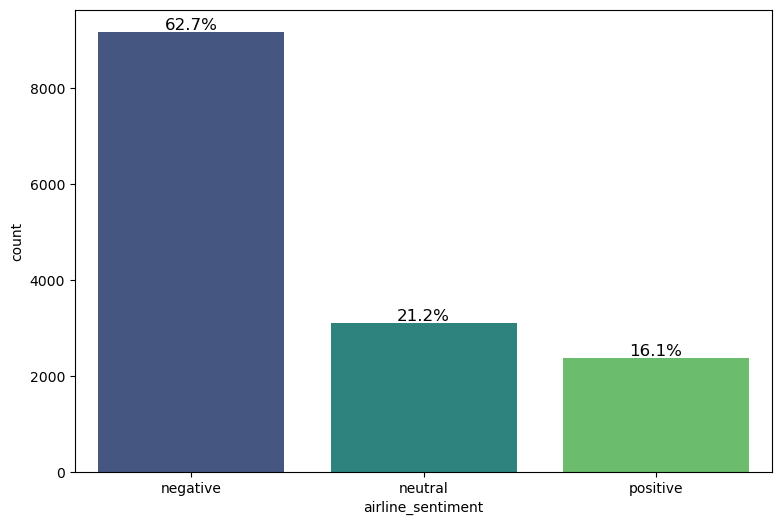

In [132]:
# create labled barplot for number of tweets by sentiment
rcParams['figure.figsize'] = 9,6
labeled_barplot(df,'airline_sentiment',perc=True)

- There are ~4 times as many tweets with negative sentiment as positive sentiment
- There are ~3 times as many tweets with negative sentiment as neutral sentiment
- This indicates that our classification model(s) will be biased by this class imbalance

### Distribution of all tweets among each airline

In [138]:
# show number of tweets by airline
df.airline.value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

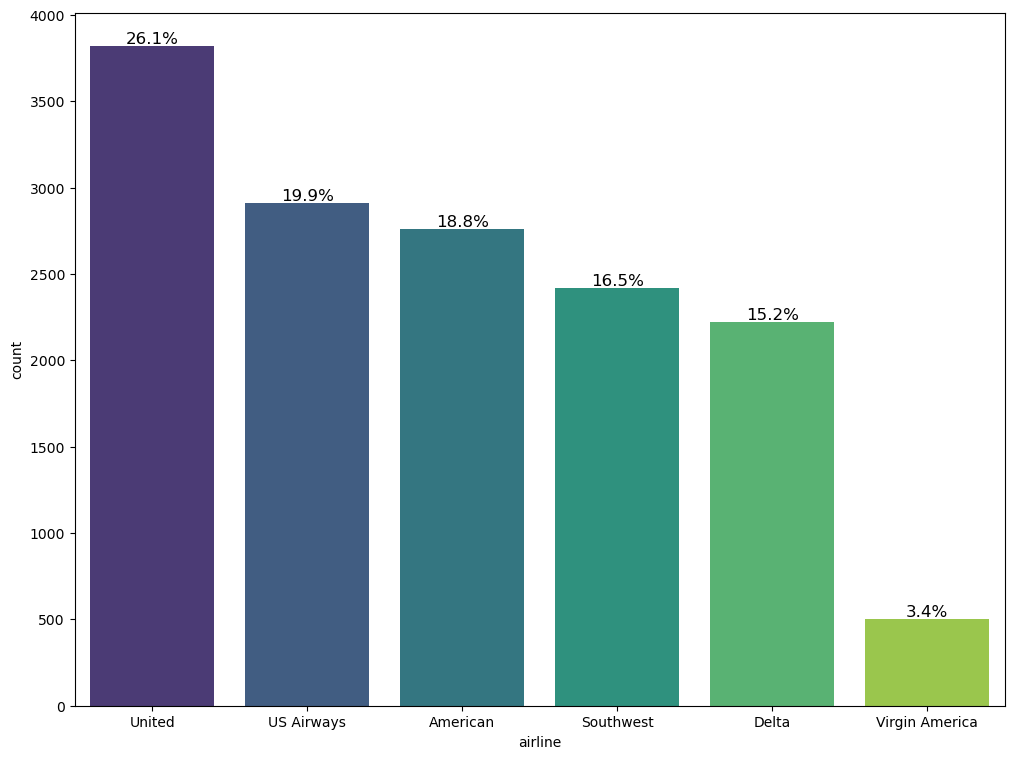

In [140]:
# create labeled barplot of number of tweets by airline
rcParams['figure.figsize'] = 12,9
labeled_barplot(df,'airline',perc=True)

- United Airlines received the highest share of tweets (~26.1%).
- While Virgin America received the fewest (~3.4%).
- This pattern likely reflects the size of each carrier and their daily flight volume.
- A useful customer service metric could be the ratio of positive to negative tweets per enplaned passenger.

### Distribution of sentiment of tweets for each airline

In [148]:
# show number of tweets by sentiment per airline
df.groupby('airline')['airline_sentiment'].value_counts()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: count, dtype: int64

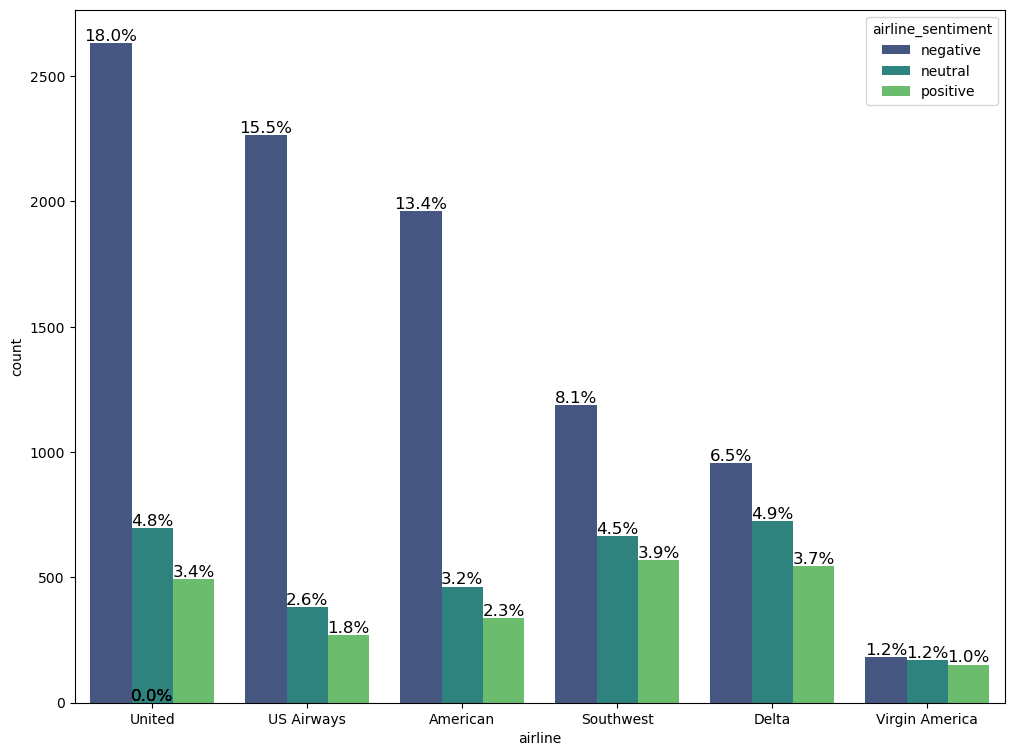

In [150]:
# create labeled barplot for number of tweets by sentiment per airline
labeled_barplot(df,'airline','airline_sentiment',perc=True)

### Distribution of all tweets among each airline

In [158]:
# show number of tweets by reason for negative sentiment
df.negativereason.value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

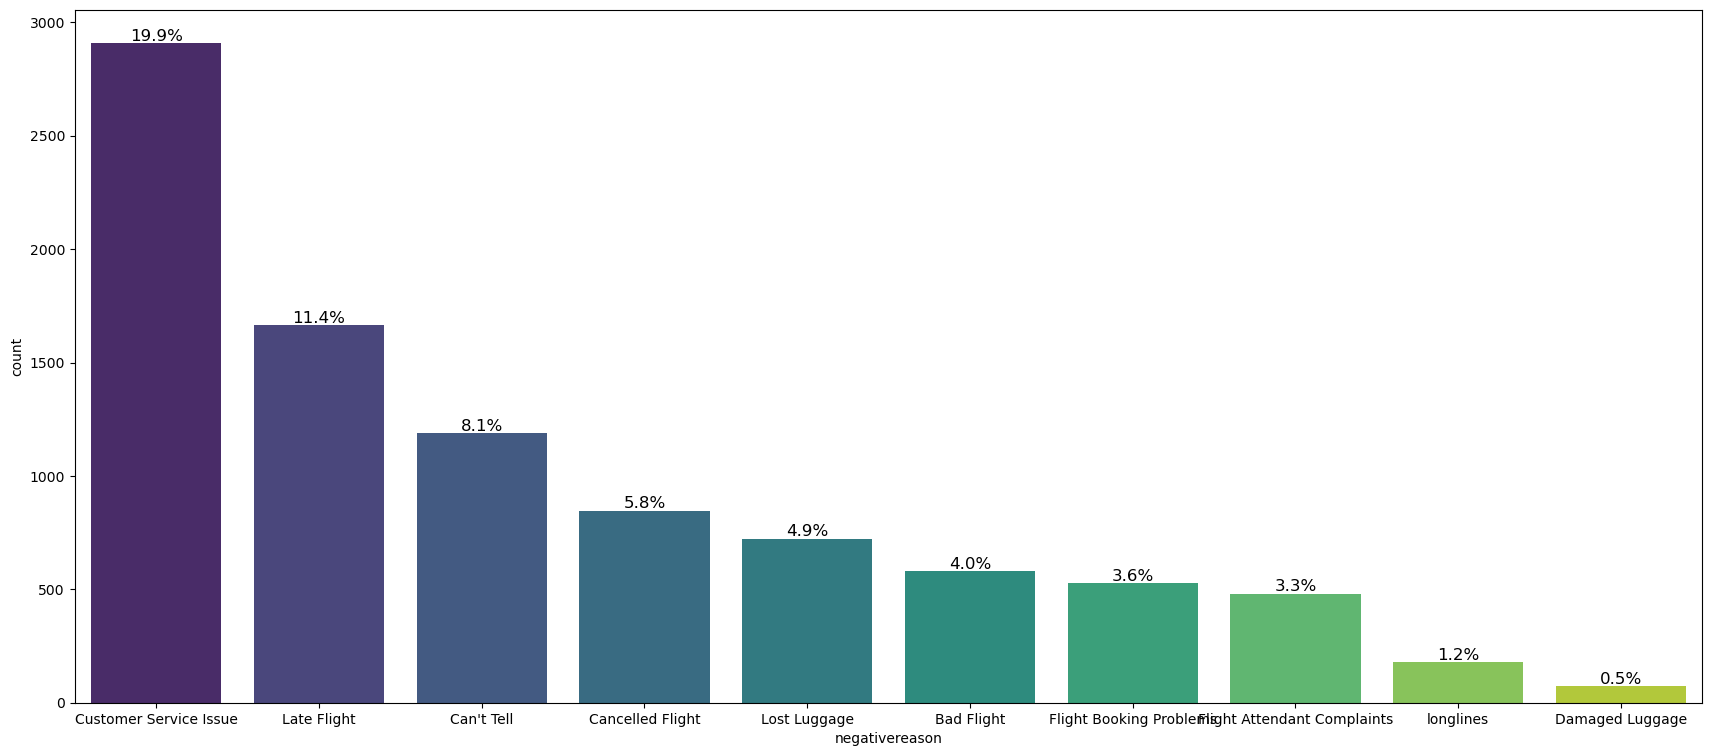

In [160]:
# create labeled barplot for number of tweets per reason for negative sentiment
rcParams['figure.figsize'] = 21,9
labeled_barplot(df,'negativereason',perc=True)

The top five reasons given for a negative tweet are:
- Customer Service Issue
- Late Flight
- Can't Tell
- Cancelled Flight
- Lost Luggage

### Word cloud of tweets with positive sentiment

In [164]:
def wordcloud(tweets):
  words = ' '.join(tweets['text'])
  cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

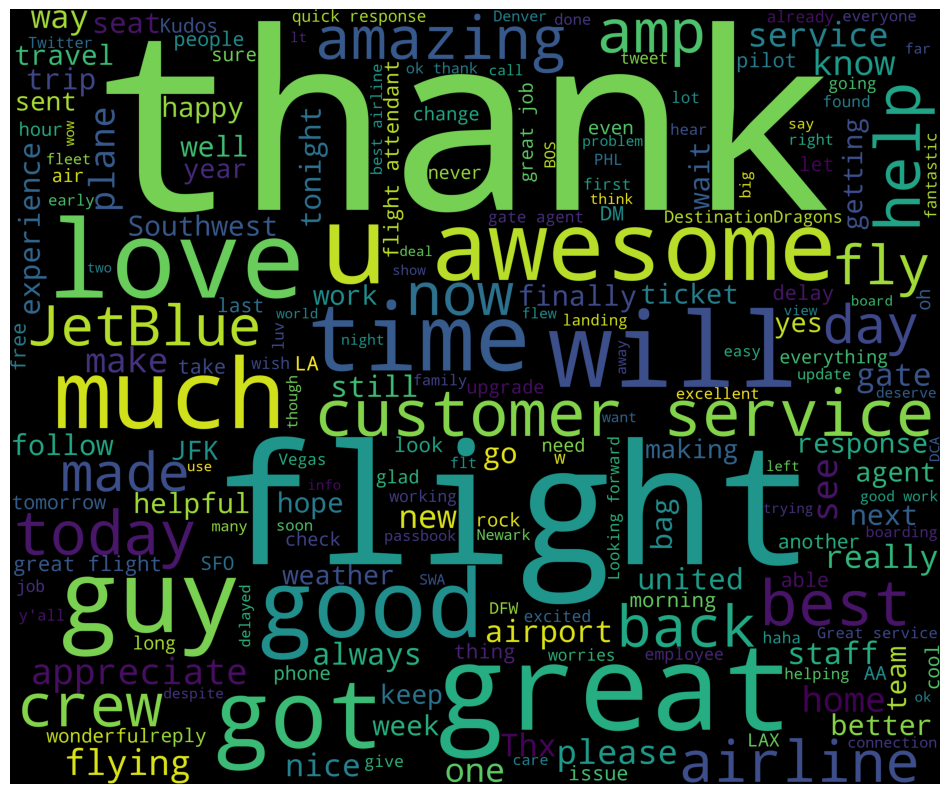

In [166]:
# create word cloud for positive tweets
pos_tweets = df[df['airline_sentiment']=='positive']
wordcloud(pos_tweets)

As expected, words like thank, awesome, love, great, amazing were the most commonly used in positive tweets

### Word cloud of tweets with negative sentiment

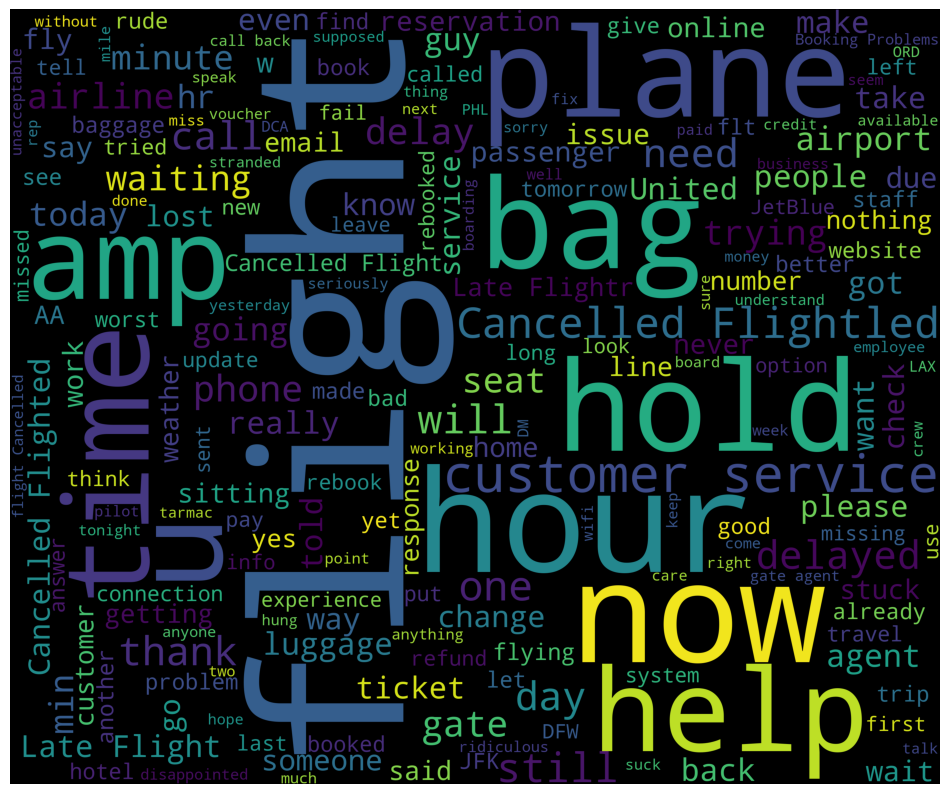

In [170]:
# create world cloud for negative tweets
neg_tweets = df[df['airline_sentiment']=='negative']
wordcloud(neg_tweets)

- The word “flight” appears frequently in both positive and negative tweets, making it unlikely to provide meaningful predictive value for a classification model.
- Consistent with the primary causes of negative sentiment, terms such as bag, time, now, cancelled, and plane appear most often in negative tweets.

### Follow-on data cleaning

In [174]:
column_list = df.columns.to_list()

In [176]:
columns = ['text','airline_sentiment']

In [178]:
drop_columns = [col for col in column_list if col not in columns]
print(drop_columns)

['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


In [180]:
# drop all other columns except “text” and “airline_sentiment”
df_model = df.drop(columns = drop_columns)

In [182]:
df_model.shape

(14640, 2)

In [184]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (non-turncated text column.)
df_model.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


## Data pre-processing

### Clean text

In [188]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
df_model['text'] = df_model['text'].apply(lambda x: clean_text(x))
df_model.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you have added commercials to the experience... tacky.
2,neutral,I did not today... Must mean I need to take another trip!
3,negative,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,and it is a really big bad thing about it


### Tokenization

In [191]:
df_model['text'] = df_model.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # tokenization of data
df_model.head()

,airline_sentiment,text
0,neutral,"[What, said, .]"
1,positive,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[and, it, is, a, really, big, bad, thing, about, it]"


### Normalize text

In [194]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [196]:
stopwords = stopwords.words('english')
custom_remove_list = ['flight']
stopwords = list(set(stopwords)) + custom_remove_list
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_hash(text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df_model['text'] = df_model.apply(lambda row: normalize(row['text']), axis=1)
df_model.head()

,airline_sentiment,text
0,neutral,say
1,positive,plus add commercials experience tacky
2,neutral,today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests face little recourse
4,negative,really big bad thing


## Supervised Learning

### Bag of Words (Count Vectorizer)

In [201]:
targets = sorted(df_model.airline_sentiment.unique().to_list())
print(targets)

['negative', 'neutral', 'positive']


In [203]:
count_vec = CountVectorizer(max_features=1000)
data_features_count = count_vec.fit_transform(df_model['text'])
data_features_count = data_features_count.toarray() 

In [205]:
data_features_count.shape

(14640, 1000)

In [209]:
X_count = data_features_count
y = df_model.airline_sentiment
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.25, shuffle=False, random_state=42)

In [211]:
base_ln = np.arange(100,400,100).tolist()

cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_count, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

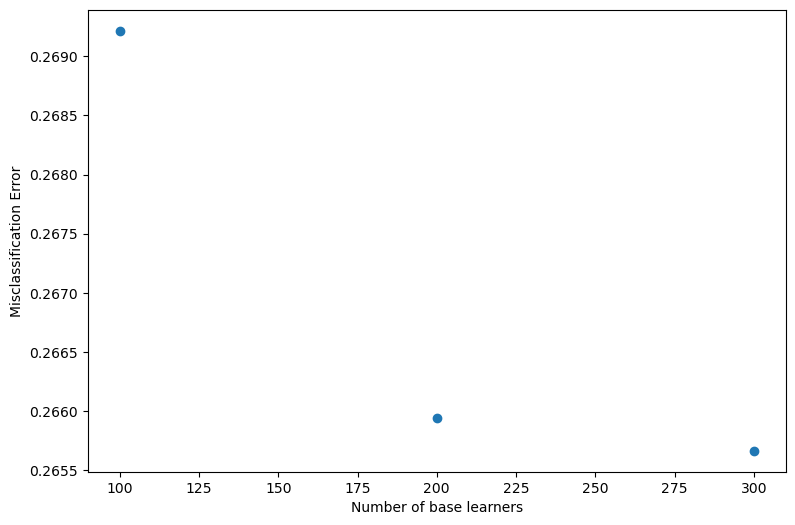

In [213]:
rcParams['figure.figsize'] = 9,6
# plot the error as k-fold increases
error = [1 - x for x in cv_scores]                                              # error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                             # optimal number of n_estimator selected by minimum error
plt.scatter(base_ln, error)                                                     # plot number of estimators with corresponding misclassification error
xy = (optimal_learners, min(error))
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [215]:
clf_count = RandomForestClassifier(n_estimators = optimal_learners, random_state=42)
clf_count.fit(X_train_count, y_train)
clf_count.score(X_test_count, y_test)
count_predicted = clf_count.predict(X_test_count)

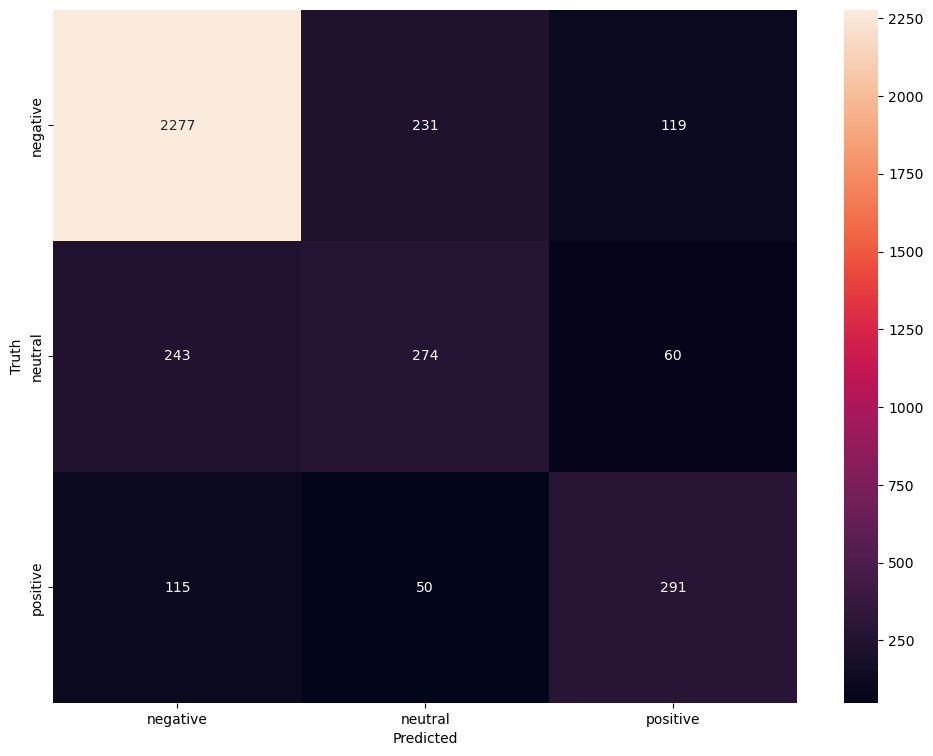

In [217]:
from sklearn.metrics import confusion_matrix
cm_count=confusion_matrix(y_test,count_predicted)

plt.figure(figsize=(12,9))
sns.heatmap(cm_count,annot=True,fmt='d',xticklabels=targets , yticklabels= targets)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [221]:
all_features_count = count_vec.get_feature_names_out()

top_features_count = ''
feat = clf_count.feature_importances_

features = np.argsort(feat)[::-1]

for i in features[:40]:
    top_features_count += all_features_count[i] + ', '

top_features_count

'thank, delay, great, love, hours, hold, awesome, bag, cancel, get, hour, amaze, best, fly, wait, worst, would, please, time, service, plane, customer, fleek, call, help, go, make, never, lose, miss, need, late, still, say, flight, try, tell, fleet, luggage, hrs, '

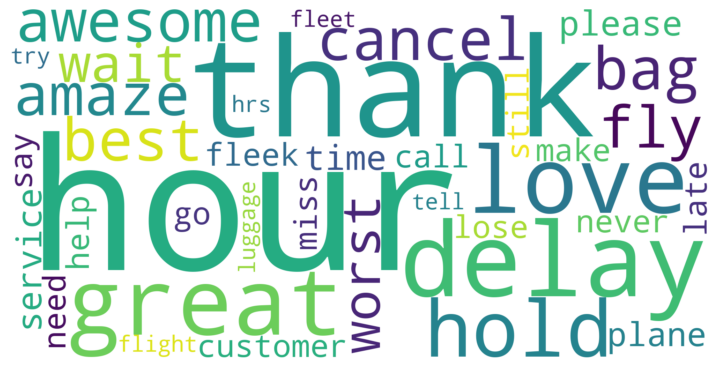

In [223]:
from wordcloud import WordCloud
wordcloud_count = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features_count)

plt.imshow(wordcloud_count, interpolation='bilinear')
plt.figure(1, figsize=(15, 12), frameon='equal')
plt.axis("off")
plt.show()

In [225]:
# saving variables for model
y_train_count = y_train
y_test_count = y_test

## Tf-Idf Vectorize

In [228]:
tfidf_vec = TfidfVectorizer(max_features=1000)
data_features_idf = tfidf_vec.fit_transform(df_model['text'])
data_features_idf = data_features_idf.toarray()  

In [230]:
data_features_idf.shape

(14640, 1000)

In [232]:
# split data into training and testing set
X_idf = data_features_idf
y = df_model.airline_sentiment
X_train_idf, X_test_idf, y_train, y_test = train_test_split(X_idf, y, test_size=0.25, shuffle=False, random_state=42)

In [234]:
base_ln = np.arange(100,400,100).tolist()

cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_idf, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

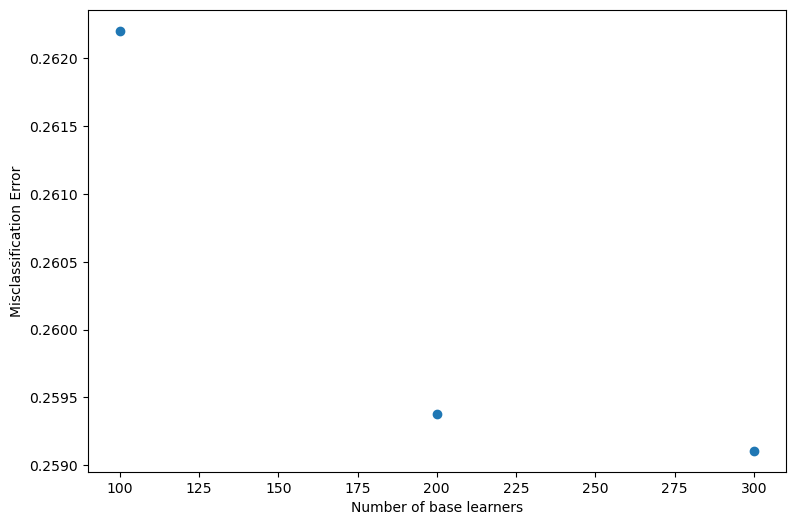

In [236]:
# plot the error as k-fold increases
error = [1 - x for x in cv_scores]                                            
optimal_learners = base_ln[error.index(min(error))]                             
plt.scatter(base_ln, error)                                                    
xy = (optimal_learners, min(error))
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [238]:
# train the best model
clf = RandomForestClassifier(n_estimators = optimal_learners, random_state=42)
clf.fit(X_train_idf, y_train)
clf.score(X_test_idf, y_test)
tf_idf_predicted = clf.predict(X_test_idf)

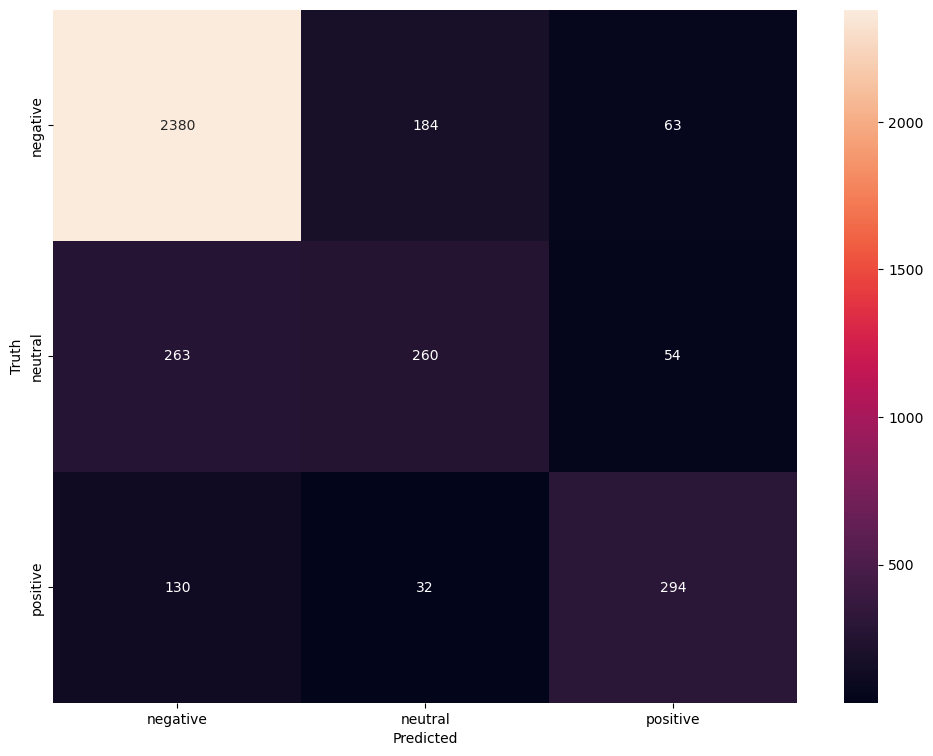

In [240]:
# create confusion matrix for TF-IDF Vectorizer
cm_tfidf=confusion_matrix(y_test , tf_idf_predicted)

plt.figure(figsize=(12,9))
sns.heatmap(cm_tfidf,annot=True,fmt='d',xticklabels=targets , yticklabels=targets)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

- The model is classifying 2,400 out of 2,627 negative tweets correctly (91%), 256 out of 577 neutral tweets correctly (44%), and 294 out of 456 positive tweets correctly (64%)

In [245]:
all_features = tfidf_vec.get_feature_names_out()

top_features = ''
feat = clf.feature_importances_

features = np.argsort(feat)[::-1]

for i in features[:40]:
    top_features += all_features[i] + ', '

top_features

'thank, delay, great, love, hours, cancel, get, hold, awesome, bag, best, hour, amaze, fly, please, fleet, wait, fleek, service, time, would, make, plane, good, follow, flight, call, customer, dm, worst, help, need, go, airline, say, know, lose, never, still, send, '

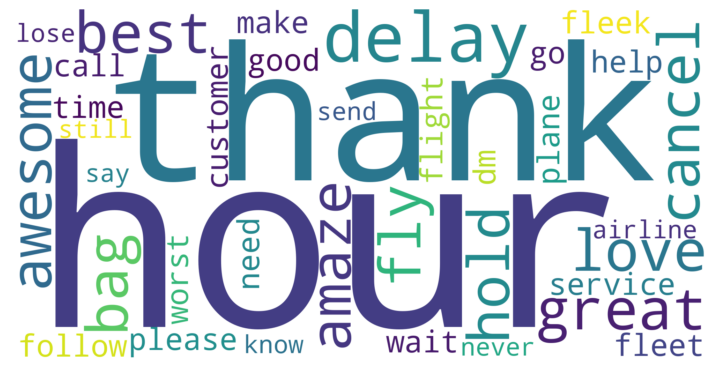

In [247]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(15, 12), frameon='equal')
plt.axis("off")
plt.show()

In [249]:
y_train_idf = y_train
y_test_idf = y_test

## Recurring Neural Network

In [252]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import LabelEncoder

In [254]:
text_corpus = df_model.text
labels_corpus = df_model.airline_sentiment

X_train, X_test, y_train, y_test = train_test_split(text_corpus, labels_corpus, test_size=0.25, random_state=42)

In [256]:
num_words=4000
maxlen=1000

In [258]:
tokenizer = Tokenizer(num_words=num_words, char_level=False)

tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

len(sequences_train)

10980

In [260]:
X_train = pad_sequences(sequences_train, maxlen=maxlen)
X_test = pad_sequences(sequences_test, maxlen=maxlen)

print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)
print(type(X_train))

Shape of data tensor: (10980, 1000)
Shape of data test tensor: (3660, 1000)
<class 'numpy.ndarray'>


In [262]:
label_encoder = LabelEncoder() 
y_train_label = label_encoder.fit_transform(y_train)
y_test_label = label_encoder.fit_transform(y_test)

### Defining the model

In [265]:
from keras import backend
import tensorflow as tf
backend.clear_session()

# set the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [267]:
def create_model(maxlen,num_words,num_categories):
    
    model = Sequential()
    
    model.add(Embedding(num_words,output_dim=100,input_length=maxlen,trainable=True))
    
    model.add(BatchNormalization())
    
    model.add(Bidirectional(LSTM(100)))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(128,activation='relu'))
    
    model.add(BatchNormalization())

    model.add(Dense(64,activation='relu'))
    
    model.add(Dropout(0.2))

    model.add(Dense(32,activation='relu'))
    
    model.add(Dense(num_categories, activation='softmax'))
              
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    return model

In [269]:
model=create_model(maxlen,num_words,df_model.airline_sentiment.nunique())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [271]:
history = model.fit(X_train, y_train_label, epochs=5, validation_split=0.25)

Epoch 1/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.6055 - loss: 0.8954 - val_accuracy: 0.4776 - val_loss: 0.9351
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.7687 - loss: 0.5635 - val_accuracy: 0.7486 - val_loss: 0.6029
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.8389 - loss: 0.4224 - val_accuracy: 0.7428 - val_loss: 0.6601
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.8774 - loss: 0.3253 - val_accuracy: 0.7067 - val_loss: 0.9639
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.9037 - loss: 0.2485 - val_accuracy: 0.7319 - val_loss: 1.1156


### Model evaluation on training data

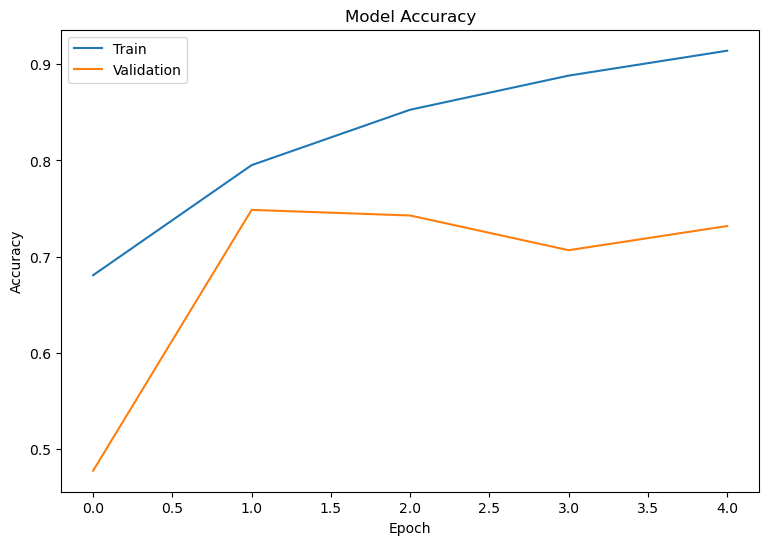

In [274]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Model evaluation on test data

In [277]:
accuracy = model.evaluate(X_test, y_test_label, verbose=2)

115/115 - 38s - 332ms/step - accuracy: 0.7497 - loss: 1.0437


In [279]:
#creating a dictionary to map model predictions to each sentiment
class_dict = {0:'negative',
 1:'neutral',
 2:'positive'}

In [281]:
#making predictions on the test data
y_pred_test = model.predict(X_test)

#converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

#calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 328ms/step


In [283]:
#creating a dataframe of model predictions
df = pd.DataFrame({"Labels":y_pred_test_classes})

#replacing predictions with sentiments
label_df = df.replace({"Labels":class_dict})

#converting dataframe to array
y_pred_test_classes = label_df.to_numpy()

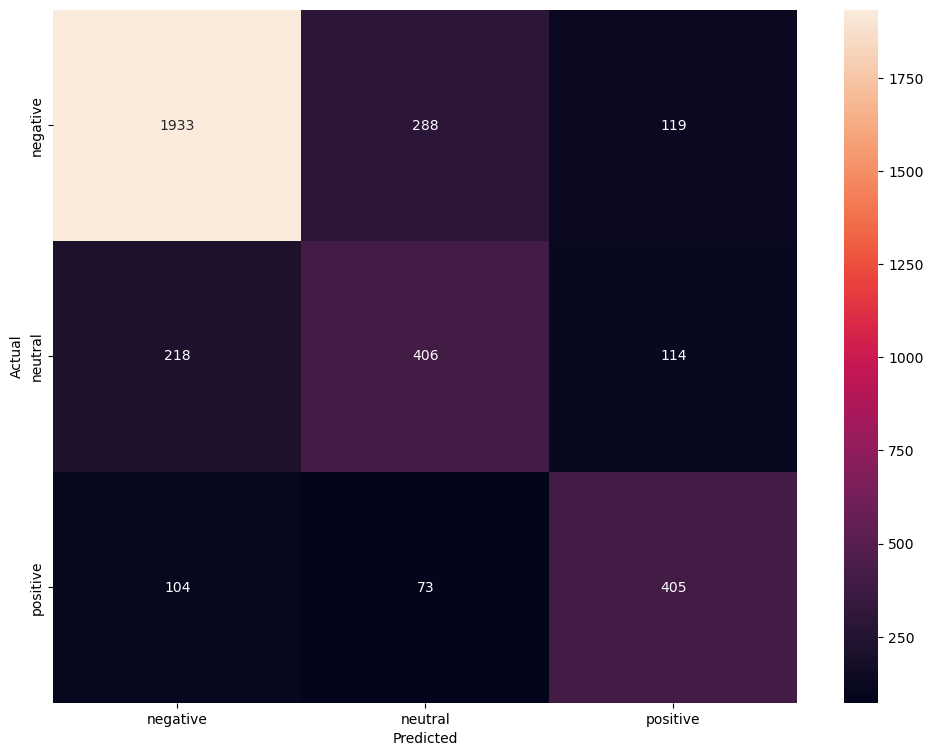

In [285]:
cm_rnn = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(12,9))
sns.heatmap(cm_rnn, annot=True,  fmt='.0f', xticklabels=targets, yticklabels=targets)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- The model is classifying 1,961 out of 2,340 negative tweets correctly (84%), 411 out of 738 neutral tweets correctly (56%), and 395 out of 582 positive tweets correctly (68%)

## Conclusions

In [289]:
# provide a classification report on the Count Vectorizer model
print("Random Forest model trained with Count Vectorizer data")
print(" ")
print(classification_report(y_test_count , count_predicted, target_names = targets))
print(" ")

# provide a classification report on the TF-IDF Vectorizer model
print("Random Forest model trained with TF-IDF Vectorizer data")
print(" ")
print(classification_report(y_test_idf , tf_idf_predicted, target_names = targets))
print(" ")

# provide the classification report on the RNN model
print("Recurring Neural Network (RNN) model")
print(" ")
print(classification_report(y_test, y_pred_test_classes))

Random Forest model trained with Count Vectorizer data
 
              precision    recall  f1-score   support

    negative       0.86      0.87      0.87      2627
     neutral       0.49      0.47      0.48       577
    positive       0.62      0.64      0.63       456

    accuracy                           0.78      3660
   macro avg       0.66      0.66      0.66      3660
weighted avg       0.78      0.78      0.78      3660

 
Random Forest model trained with TF-IDF Vectorizer data
 
              precision    recall  f1-score   support

    negative       0.86      0.91      0.88      2627
     neutral       0.55      0.45      0.49       577
    positive       0.72      0.64      0.68       456

    accuracy                           0.80      3660
   macro avg       0.71      0.67      0.68      3660
weighted avg       0.79      0.80      0.80      3660

 
Recurring Neural Network (RNN) model
 
              precision    recall  f1-score   support

    negative       0.86  

- built three different models to predict the sentiment of tweets about six major airlines. Out of all of them, the Random Forest model using TF-IDF features performed the best, giving us the highest accuracy and the most balanced F1-scores across all three sentiment categories.

- From this analysis, airlines can get a clearer picture of what parts of their service lead to positive or negative reactions from customers. With these models, they can also respond to negative tweets much faster than they could through traditional surveys. This quicker response can help them address issues early and prevent small problems from growing into something that could hurt their brand or overall business.